# Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from pathlib import Path
current_path = Path(os.getcwd())

In [ ]:
current_path

PosixPath('/content')

In [ ]:
new_path = current_path /"drive" / "MyDrive"/"드라이브"

In [ ]:
os.chdir(new_path)

In [ ]:
print(Path(os.getcwd()))

/content/drive/MyDrive/드라이브


In [ ]:
!unzip ./data/archive.zip -d ./data/archive

Archive:  ./data/archive.zip


## 1. 데이터 전처리

### 1) 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
fetus = pd.read_csv('data/archive/fetal_health.csv')

In [ ]:
fetus.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


### 2) 데이터 EDA

In [ ]:
fetus.shape # (관측치, 변수)

(2126, 22)

In [ ]:
fetus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolonged_decelerations                                 2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [ ]:
fetus.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolonged_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
fetus.isnull().sum().sort_values(ascending=False)

fetal_health                                              0
histogram_tendency                                        0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes              

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plot = fetus[['fetal_health','baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions','percentage_of_time_with_abnormal_long_term_variability',
       'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]

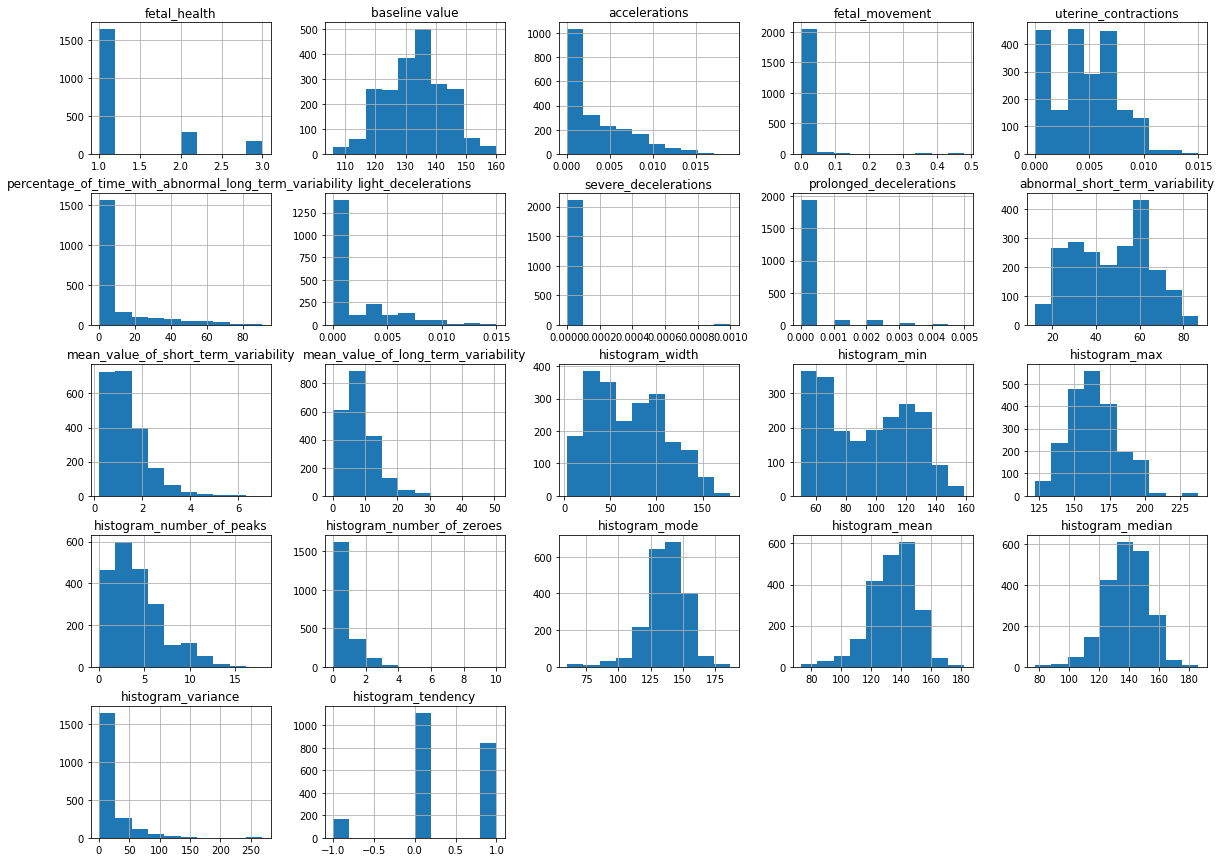

In [ ]:
plot.hist(figsize=(20,15))
plt.show()

* fetal_health: 태아 건강상태
* baseline value: 태아 심장박동수
* accelerations: 초당 acceleration 수
* fetal_movement: 초당 태동 횟수
* uterine_contractions: 초당 자궁수축 횟수
* light_decelerations: 초당 light deceleration 수
* severe_decelerations: 초당 severe deceleration 수 
* prolongued_decelerations: 초당 장기 deceleration 수
* abnormal_short_term_variability: 비정상적 단기 변이도 시간에 대한 비율
* mean_value_of_short_term_variability: 단기 변이도 평균
* percentage_of_time_with_abnormal_long_term_variability: 비정상적 장기 변이도 시간에 대한 비율
* mean_value_of_long_term_variability: 장기 변이도 평균
* histogram_width: 검사결과 히스토그램의 폭
* histogram_min: 검사결과 히스토그램의 최소값
* histogram_max: 검사결과 히스토그램의 최대값
* histogram_number_of_peaks: 검사결과 히스토그램의 peak
* histogram_number_of_zeroes: 검사결과 히스토그램에서 0의 수
* histogram_mode: 검사결과 히스토그램의 최빈값
* histogram_mean: 검사결과 히스토그램의 평균
* histogram_median: 검사결과 히스토그램의 중앙값
* histogram_variance: 검사결과 히스토그램의 분산
* histogram_tendency: 검사결과 히스토그램의 경향성

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


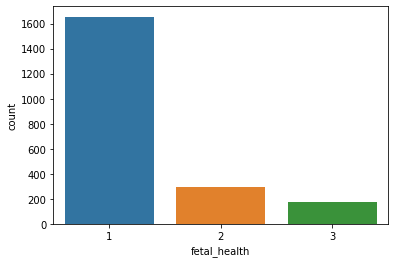

In [ ]:
sns.countplot(fetus['fetal_health'])
plt.show()

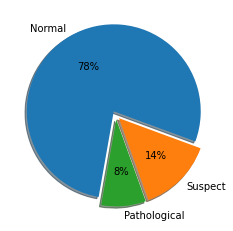

In [ ]:
ratio = fetus['fetal_health'].value_counts().tolist()
labels = ['Normal', 'Suspect', 'Pathological']
explode = [0.05, 0.05, 0.05]
plt.pie(ratio, labels = labels,  autopct="%1.0f%%", startangle=260, counterclock=False, explode=explode, shadow=True)
plt.show()

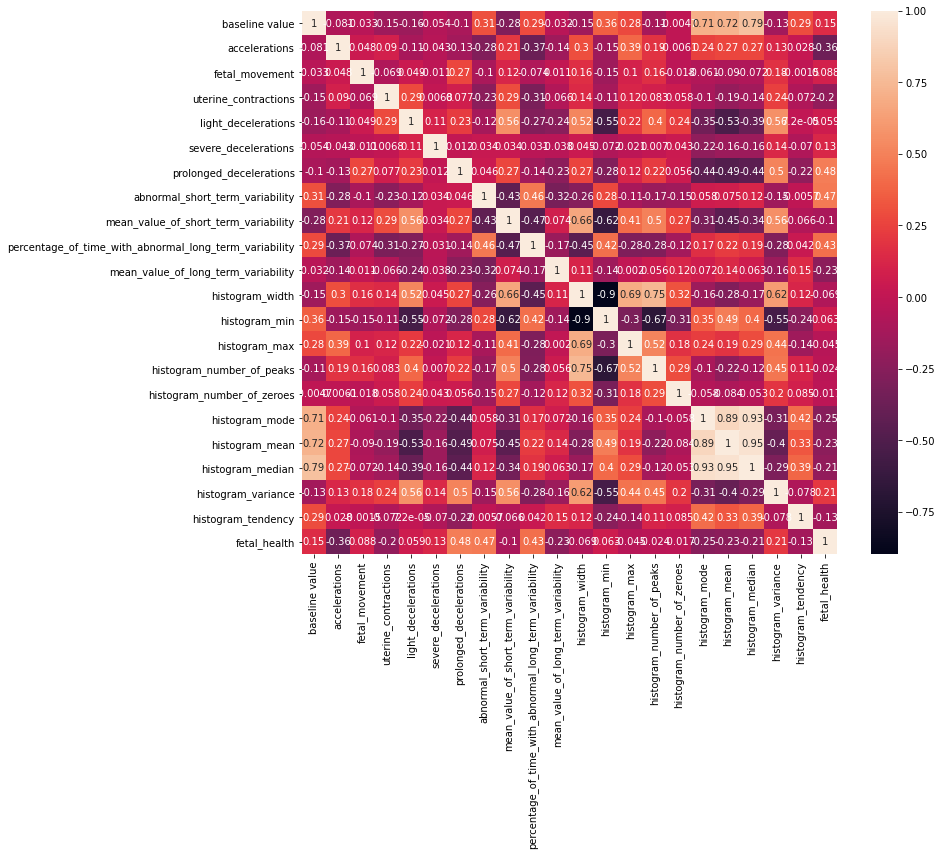

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(fetus.corr(), annot=True)
plt.show()

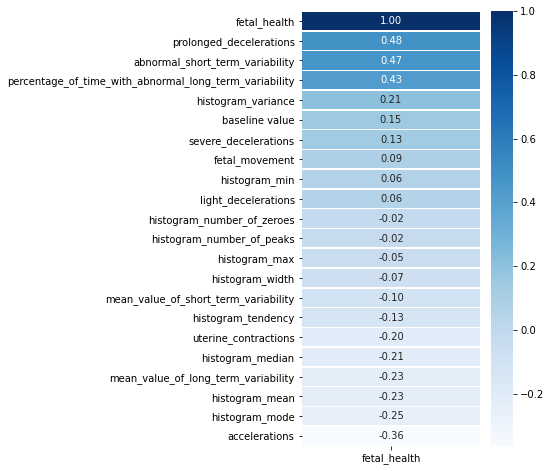

In [ ]:
plt.figure(figsize=(4,8))
sns.heatmap(fetus.corr()[['fetal_health']].sort_values('fetal_health',ascending=0), cmap='Blues', annot=True, fmt = '.2f', linewidths=.5, )

### 3) 데이터 형변환

In [ ]:
fetus['histogram_tendency'] = fetus['histogram_tendency'].astype('category')
fetus['fetal_health'] = fetus['fetal_health'].astype('category') 

In [ ]:
fetus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   baseline value                                          2126 non-null   int64   
 1   accelerations                                           2126 non-null   float64 
 2   fetal_movement                                          2126 non-null   float64 
 3   uterine_contractions                                    2126 non-null   float64 
 4   light_decelerations                                     2126 non-null   float64 
 5   severe_decelerations                                    2126 non-null   float64 
 6   prolonged_decelerations                                 2126 non-null   float64 
 7   abnormal_short_term_variability                         2126 non-null   int64   
 8   mean_value_of_short_term_var

### 4) 스케일링

In [ ]:
data = fetus.copy()

In [ ]:
X = data.drop(['fetal_health'], axis=1)
y = data['fetal_health']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

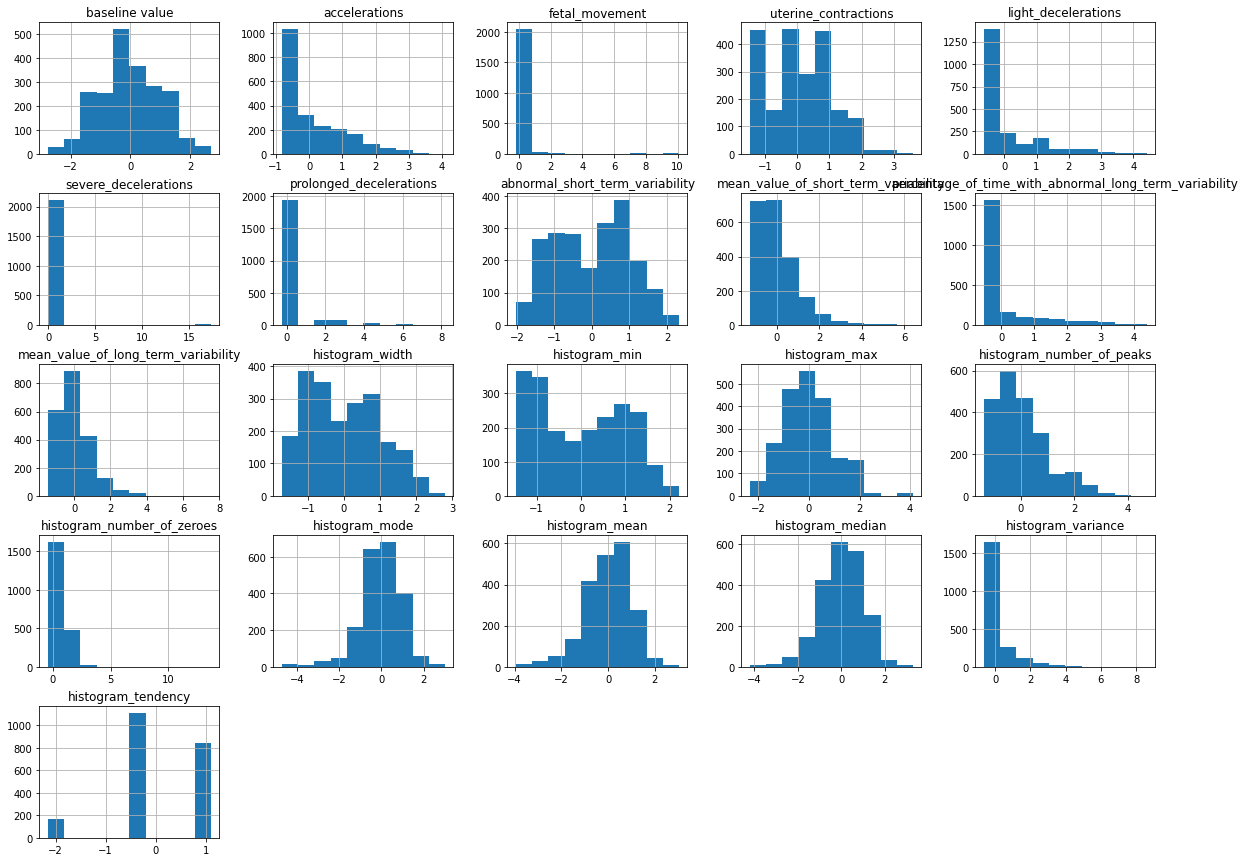

In [ ]:
col_names = data.drop(['fetal_health'], axis=1).columns.tolist()
X_scale = pd.DataFrame(X)
X_scale.columns = col_names
X_scale.hist(figsize=(20,15))
plt.show()

### 5) outlier 처리

In [ ]:
df = fetus.copy()

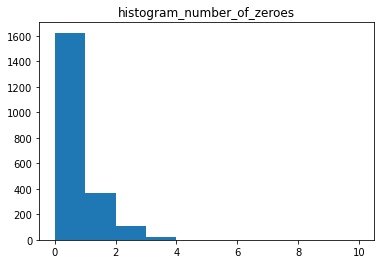

In [ ]:
plt.hist(df['histogram_number_of_zeroes'])
plt.title('histogram_number_of_zeroes')
plt.show()

In [ ]:
pd.DataFrame(df['histogram_number_of_zeroes'].value_counts()).sort_index()

,histogram_number_of_zeroes
0,1624
1,366
2,108
3,21
4,2
5,2
7,1
8,1
10,1


In [ ]:
df = df[df['histogram_number_of_zeroes']<4]

### 6) PCA

In [ ]:
from sklearn.decomposition import PCA

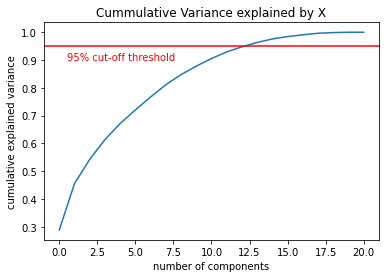

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color = 'red', fontsize=10)
plt.title('Cummulative Variance explained by X')
plt.show()

In [ ]:
pca = PCA(n_components=12) 
X_pca = pca.fit_transform(X)

In [ ]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
X_histogram = data[['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]

In [ ]:
X_pca = scaler.fit_transform(X_histogram)

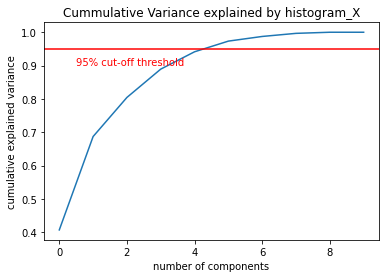

In [ ]:
pca = PCA().fit(X_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color = 'red', fontsize=10)
plt.title('Cummulative Variance explained by histogram_X')
plt.show()

In [ ]:
pca = PCA(n_components=4) 
X_histogram = pca.fit_transform(X_histogram)
X_histogram = pd.DataFrame(X_histogram)

In [ ]:
X_not = data[['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']]
X_hg_pca = pd.concat([X_not, X_histogram], axis=1)

### 7) 파생변수 생성

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

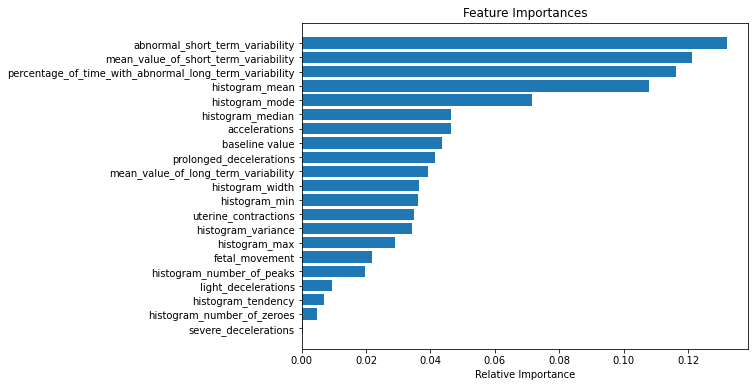

In [ ]:
forest_clf = RandomForestClassifier() 
forest_clf.fit(X, y)
importances = forest_clf.feature_importances_
indices = np.argsort(importances)
features = data.drop(['fetal_health'], axis=1).columns.tolist()
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from xgboost import XGBClassifier

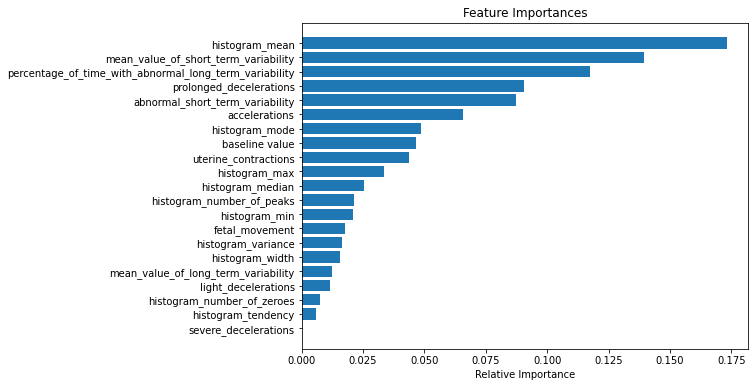

In [ ]:
xgb_clf = XGBClassifier() 
xgb_clf.fit(X, y)
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)
features = data.drop(['fetal_health'], axis=1).columns.tolist()
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df = fetus.copy()

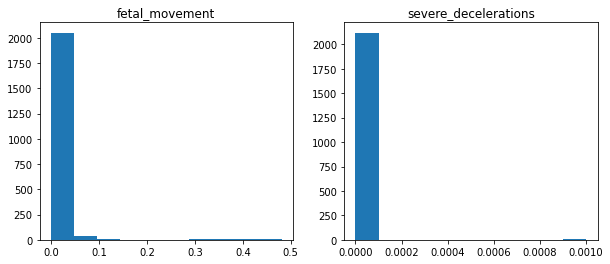

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.hist(df['fetal_movement'])
ax1.set_title('fetal_movement')
ax2.hist(df['severe_decelerations'])
ax2.set_title('severe_decelerations')
plt.show()

In [ ]:
df['fetal_movement_or_not'] = df['fetal_movement'].apply(lambda x: '1' if x!=0 else '0').astype('category')
df['severe_decelerations_or_not'] = df['severe_decelerations'].apply(lambda x: '1' if x!=0 else '0').astype('category')
df = df.drop(['fetal_movement', 'severe_decelerations'], axis=1)

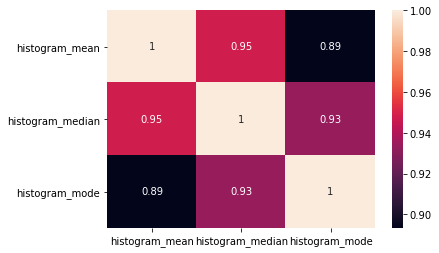

In [ ]:
corr = df[['histogram_mean', 'histogram_median', 'histogram_mode']]
sns.heatmap(corr.corr(), annot=True)
plt.show()

In [ ]:
df['skewness'] = np.where(df['histogram_mean']>df['histogram_median'], '1', '0')
df['skewness'] = df['skewness'].astype('category')
df = df.drop(['histogram_median', 'histogram_mode'], axis=1)

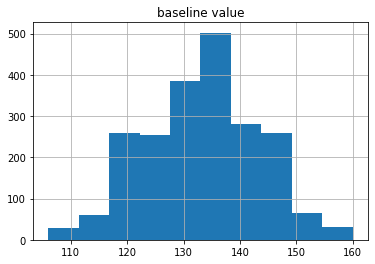

In [ ]:
df['baseline value'].hist()
plt.title('baseline value')
plt.show()

In [ ]:
df['baseline value'].describe()

count    2126.000000
mean      133.303857
std         9.840844
min       106.000000
25%       126.000000
50%       133.000000
75%       140.000000
max       160.000000
Name: baseline value, dtype: float64

In [ ]:
df['over_baseline_value'] = df['baseline value'].apply(lambda x: '1' if x<110 else '0').astype('category')

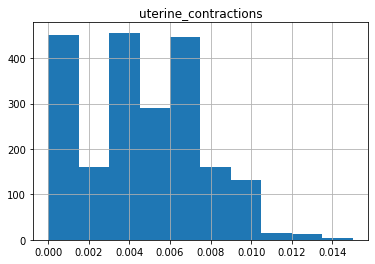

In [ ]:
df['uterine_contractions'].hist()
plt.title('uterine_contractions')
plt.show()

In [ ]:
criteria = 2/(10*60) # 기준: 10분에 2번
df['uterine_contractions_normal'] = df['uterine_contractions'].apply(lambda x: '1' if x>criteria else '0').astype('category')

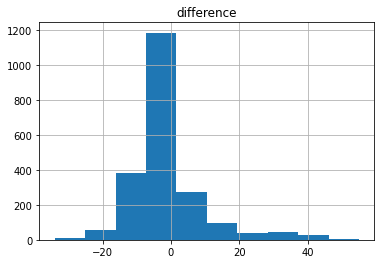

In [ ]:
df['difference'] = df['baseline value']-df['histogram_mean']
df['difference'].hist()
plt.title('difference')
plt.show()

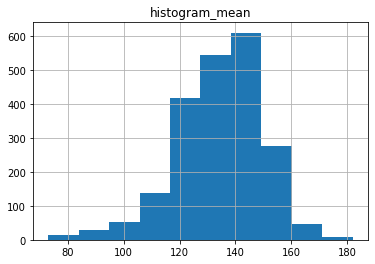

In [ ]:
df['histogram_mean'].hist()
plt.title('histogram_mean')
plt.show()

In [ ]:
df['histogram_mean_abnormal'] = df['histogram_mean'].apply(lambda x: '1' if x>160 and x<110 else '0').astype('category')

In [ ]:
X_new = df.drop(['fetal_health'], axis=1)
X_new = scaler.fit_transform(X_new)
y_new = df['fetal_health']

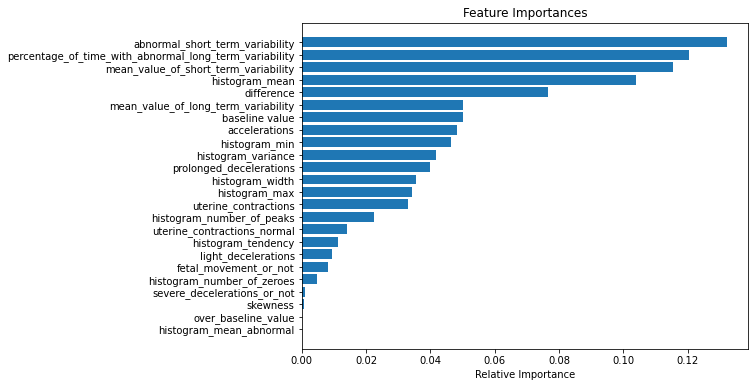

In [ ]:
forest_clf = RandomForestClassifier() 
forest_clf.fit(X_new, y_new)
importances = forest_clf.feature_importances_
indices = np.argsort(importances)
features = df.drop(['fetal_health'], axis=1).columns.tolist()
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

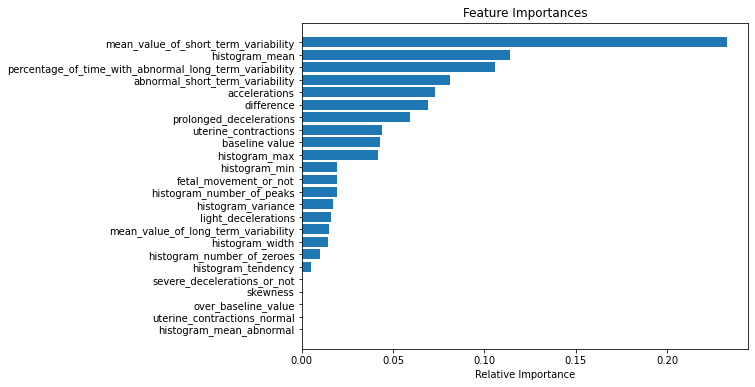

In [ ]:
xgb_clf = XGBClassifier() 
xgb_clf.fit(X_new, y_new)
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)
features = df.drop(['fetal_health'], axis=1).columns.tolist()
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
X_var = df.drop(['light_decelerations','histogram_number_of_peaks','fetal_movement_or_not','skewness',
                 'over_baseline_value','uterine_contractions_normal','histogram_mean_abnormal','fetal_health'], axis=1)
X_var = scaler.fit_transform(X_var)
y_var = df['fetal_health']

### 8) 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X, y, test_size=0.2, stratify = y,random_state=42)

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, stratify = y,random_state=42)

In [ ]:
X_train_hg, X_test_hg, y_train_hg, y_test_hg = train_test_split(X_hg_pca, y, test_size=0.2, stratify = y,random_state=42)

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, stratify = y_new,random_state=42)

In [ ]:
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(X_var, y_var, test_size=0.2, stratify = y_var,random_state=42)

## 2. 모델링

### 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_score = log_clf.score(X_test, y_test)
print('Logistic Regression: {:5f} accuracy'.format(log_score))

Logistic Regression: 0.877934 accuracy


In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train_st, y_train_st)
log_score = log_clf.score(X_test_st, y_test_st)
print('Logistic Regression: {:5f} accuracy'.format(log_score))

Logistic Regression: 0.884977 accuracy


In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train_pca, y_train_pca)
log_score = log_clf.score(X_test_pca, y_test_pca)
print('Logistic Regression: {:5f} accuracy'.format(log_score))

Logistic Regression: 0.889671 accuracy


In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train_hg, y_train_hg)
log_score = log_clf.score(X_test_hg, y_test_hg)
print('Logistic Regression: {:5f} accuracy'.format(log_score))

Logistic Regression: 0.845070 accuracy


In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train_new, y_train_new)
log_score = log_clf.score(X_test_new, y_test_new)
print('Logistic Regression: {:5f} accuracy'.format(log_score))

Logistic Regression: 0.889671 accuracy


In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train_var, y_train_var)
log_score = log_clf.score(X_test_var, y_test_var)
print('Logistic Regression: {:5f} accuracy'.format(log_score))

Logistic Regression: 0.868545 accuracy


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
params = {"C":[0.1, 10, 100],
          "penalty": ['l1', 'l2'],
          "tol": [0.0001,0.0002,0.0003],
          "intercept_scaling": [1, 2, 3, 4]}

In [ ]:
cv_method = StratifiedKFold(n_splits=3, random_state=42)

In [ ]:
grid_log = GridSearchCV(estimator=LogisticRegression(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_log.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 10, 100], 'intercept_scaling': [1, 2, 3, 4],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [ ]:
grid_log.best_params_

{'C': 10, 'intercept_scaling': 1, 'penalty': 'l2', 'tol': 0.0001}

In [ ]:
grid_log = LogisticRegression(C = 10, 
                              intercept_scaling = 1, 
                              penalty = 'l2',
                              tol = 0.0001)
grid_log.fit(X_train_pca, y_train_pca)
log_score = grid_log.score(X_test_pca, y_test_pca)
print('Logistic Regression: {:5f} accuracy'.format(log_score))

Logistic Regression: 0.884977 accuracy


In [ ]:
grid_log = GridSearchCV(estimator=LogisticRegression(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_log.fit(X_train_new, y_train_new)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 10, 100], 'intercept_scaling': [1, 2, 3, 4],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [ ]:
grid_log.best_params_

{'C': 0.1, 'intercept_scaling': 1, 'penalty': 'l2', 'tol': 0.0001}

In [ ]:
grid_log = LogisticRegression(C = 0.1, 
                              intercept_scaling = 1, 
                              penalty = 'l2',
                              tol = 0.0001)
grid_log.fit(X_train_new, y_train_new)
log_score = grid_log.score(X_test_new, y_test_new)
print('Logistic Regression: {:5f} accuracy'.format(log_score))

Logistic Regression: 0.877934 accuracy


In [ ]:
class_weight = {1: (100-78)/100,
                2: (100-14)/100,
                3: (100-8)/100}

In [ ]:
log_clf_w = LogisticRegression(class_weight= class_weight)
log_clf_w.fit(X_train_st, y_train_st)

LogisticRegression(C=1.0, class_weight={1: 0.22, 2: 0.86, 3: 0.92}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_w_score = log_clf_w.score(X_test_st, y_test_st)
print('Logistic Regression: {:5f} accuracy'.format(log_w_score))

Logistic Regression: 0.884977 accuracy


### 2) Stochastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_score = sgd_clf.score(X_test, y_test)
print('Stochastic Gradient Descent Classifier: {:5f} accuracy'.format(sgd_score))

Stochastic Gradient Descent Classifier: 0.866197 accuracy


In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_st, y_train_st)
sgd_score = sgd_clf.score(X_test_st, y_test_st)
print('Stochastic Gradient Descent Classifier: {:5f} accuracy'.format(sgd_score))

Stochastic Gradient Descent Classifier: 0.882629 accuracy


In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_pca, y_train_pca)
sgd_score = sgd_clf.score(X_test_pca, y_test_pca)
print('Stochastic Gradient Descent Classifier: {:5f} accuracy'.format(sgd_score))

Stochastic Gradient Descent Classifier: 0.868545 accuracy


In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_hg, y_train_hg)
sgd_score = sgd_clf.score(X_test_hg, y_test_hg)
print('Stochastic Gradient Descent Classifier: {:5f} accuracy'.format(sgd_score))

Stochastic Gradient Descent Classifier: 0.779343 accuracy


In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_new, y_train_new)
sgd_score = sgd_clf.score(X_test_new, y_test_new)
print('Stochastic Gradient Descent Classifier: {:5f} accuracy'.format(sgd_score))

Stochastic Gradient Descent Classifier: 0.875587 accuracy


In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_var, y_train_var)
sgd_score = sgd_clf.score(X_test_var, y_test_var)
print('Stochastic Gradient Descent Classifier: {:5f} accuracy'.format(sgd_score))

Stochastic Gradient Descent Classifier: 0.847418 accuracy


In [ ]:
params = {"alpha": [0.0003, 0.0005, 0.0007],
          "tol": [0.0001, 0.0003, 0.0005],
          "max_iter": [100, 500, 1000]}

In [ ]:
grid_sgd = GridSearchCV(estimator=SGDClassifier(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_sgd.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0003, 0.0005, 0.0007],
                         'max_iter': [100, 500, 1000],
                         

In [ ]:
grid_sgd.best_params_

{'alpha': 0.0007, 'max_iter': 100, 'tol': 0.0001}

In [ ]:
grid_sgd = SGDClassifier(alpha = 0.0007,
                         max_iter = 100,
                         tol = 0.0001)
grid_sgd.fit(X_train_pca, y_train_pca)
sgd_score = grid_sgd.score(X_test_pca, y_test_pca)
print('Stochastic Gradient Descent Classifier: {:5f} accuracy'.format(sgd_score))

Stochastic Gradient Descent Classifier: 0.889671 accuracy


### 3) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
forest_clf = RandomForestClassifier() 
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_test)
forest_score = accuracy_score(y_test, y_pred)
print('Random Forest Classifier: {:5f} accuracy'.format(forest_score))

Random Forest Classifier: 0.950704 accuracy


In [ ]:
forest_clf = RandomForestClassifier() 
forest_clf.fit(X_train_st, y_train_st)
y_pred = forest_clf.predict(X_test_st)
forest_score = accuracy_score(y_test_st, y_pred)
print('Random Forest Classifier: {:5f} accuracy'.format(forest_score))

Random Forest Classifier: 0.927230 accuracy


In [ ]:
forest_clf = RandomForestClassifier() 
forest_clf.fit(X_train_pca, y_train_pca)
y_pred = forest_clf.predict(X_test_pca)
forest_score = accuracy_score(y_test_pca, y_pred)
print('Random Forest Classifier: {:5f} accuracy'.format(forest_score))

Random Forest Classifier: 0.896714 accuracy


In [ ]:
forest_clf = RandomForestClassifier() 
forest_clf.fit(X_train_hg, y_train_hg)
y_pred = forest_clf.predict(X_test_hg)
forest_score = accuracy_score(y_test_hg, y_pred)
print('Random Forest Classifier: {:5f} accuracy'.format(forest_score))

Random Forest Classifier: 0.922535 accuracy


In [ ]:
forest_clf = RandomForestClassifier() 
forest_clf.fit(X_train_new, y_train_new)
y_pred = forest_clf.predict(X_test_new)
forest_score = accuracy_score(y_test_new, y_pred)
print('Random Forest Classifier: {:5f} accuracy'.format(forest_score))

Random Forest Classifier: 0.929577 accuracy


In [ ]:
forest_clf = RandomForestClassifier() 
forest_clf.fit(X_train_var, y_train_var)
y_pred = forest_clf.predict(X_test_var)
forest_score = accuracy_score(y_test_var, y_pred)
print('Random Forest Classifier: {:5f} accuracy'.format(forest_score))

Random Forest Classifier: 0.931925 accuracy


In [ ]:
params = {"min_samples_split": [1, 3, 5, 10],
              "min_samples_leaf": [1, 2, 3, 4],
              "n_estimators" :[200, 400, 600]}

In [ ]:
grid_forest = GridSearchCV(estimator=RandomForestClassifier(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [ ]:
grid_forest.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}

In [ ]:
grid_forest = RandomForestClassifier(min_samples_leaf = 1,
                                     min_samples_split = 5,
                                     n_estimators = 600)
grid_forest.fit(X_train, y_train)
y_pred = grid_forest.predict(X_test)
forest_score = accuracy_score(y_test, y_pred)
print('Random Forest Classifier: {:5f} accuracy'.format(forest_score))

Random Forest Classifier: 0.953052 accuracy


### 4) Support Vector Classifier

In [ ]:
from sklearn.svm import SVC 

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
svm_score = accuracy_score(y_test, y_pred)
print('Support Vector Classifier: {:5f} accuracy'.format(svm_score))

Support Vector Classifier: 0.903756 accuracy


In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_st, y_train_st)
y_pred = svm_clf.predict(X_test_st)
svm_score = accuracy_score(y_test_st, y_pred)
print('Support Vector Classifier: {:5f} accuracy'.format(svm_score))

Support Vector Classifier: 0.894366 accuracy


In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_pca, y_train_pca)
y_pred = svm_clf.predict(X_test_pca)
svm_score = accuracy_score(y_test_pca, y_pred)
print('Support Vector Classifier: {:5f} accuracy'.format(svm_score))

Support Vector Classifier: 0.887324 accuracy


In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_hg, y_train_hg)
y_pred = svm_clf.predict(X_test_hg)
svm_score = accuracy_score(y_test_hg, y_pred)
print('Support Vector Classifier: {:5f} accuracy'.format(svm_score))

Support Vector Classifier: 0.875587 accuracy


In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_new, y_train_new)
y_pred = svm_clf.predict(X_test_new)
svm_score = accuracy_score(y_test_new, y_pred)
print('Support Vector Classifier: {:5f} accuracy'.format(svm_score))

Support Vector Classifier: 0.894366 accuracy


In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_var, y_train_var)
y_pred = svm_clf.predict(X_test_var)
svm_score = accuracy_score(y_test_var, y_pred)
print('Support Vector Classifier: {:5f} accuracy'.format(svm_score))

Support Vector Classifier: 0.889671 accuracy


In [ ]:
params = {"C": [0.001, 0.01, 0.1, 1, 10],
          "gamma": [0.001, 0.01, 0.1, 1]}

In [ ]:
grid_svc = GridSearchCV(estimator=SVC(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_svc.best_params_

{'C': 10, 'gamma': 0.1}

In [ ]:
grid_svc = SVC(C=10, gamma=0.1)
grid_svc.fit(X_train, y_train)
y_pred = grid_svc.predict(X_test)
svm_score = accuracy_score(y_test, y_pred)
print('Support Vector Classifier: {:5f} accuracy'.format(svm_score))

Support Vector Classifier: 0.934272 accuracy


### 5) KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
knn_score = accuracy_score(y_test, y_pred)
print('KNeighbors Classifier: {:5f} accuracy'.format(knn_score))

KNeighbors Classifier: 0.915493 accuracy


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_st, y_train_st)
y_pred = knn_clf.predict(X_test_st)
knn_score = accuracy_score(y_test_st, y_pred)
print('KNeighbors Classifier: {:5f} accuracy'.format(knn_score))

KNeighbors Classifier: 0.873239 accuracy


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train_pca)
y_pred = knn_clf.predict(X_test_pca)
knn_score = accuracy_score(y_test_pca, y_pred)
print('KNeighbors Classifier: {:5f} accuracy'.format(knn_score))

KNeighbors Classifier: 0.875587 accuracy


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_hg, y_train_hg)
y_pred = knn_clf.predict(X_test_hg)
knn_score = accuracy_score(y_test_hg, y_pred)
print('KNeighbors Classifier: {:5f} accuracy'.format(knn_score))

KNeighbors Classifier: 0.894366 accuracy


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_new, y_train_new)
y_pred = knn_clf.predict(X_test_new)
knn_score = accuracy_score(y_test_new, y_pred)
print('KNeighbors Classifier: {:5f} accuracy'.format(knn_score))

KNeighbors Classifier: 0.870892 accuracy


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_var, y_train_var)
y_pred = knn_clf.predict(X_test_var)
knn_score = accuracy_score(y_test_var, y_pred)
print('KNeighbors Classifier: {:5f} accuracy'.format(knn_score))

KNeighbors Classifier: 0.875587 accuracy


In [ ]:
params = {"leaf_size": list(range(1,30)),
          "n_neighbors": list(range(1,21)),
          "p": [1,2]}

In [ ]:
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [ ]:
grid_knn.best_params_

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}

In [ ]:
grid_knn = KNeighborsClassifier(leaf_size = 1, 
                                n_neighbors = 5,
                                p = 1)
grid_knn.fit(X_train, y_train)
y_pred = grid_knn.predict(X_test)
knn_score = accuracy_score(y_test, y_pred)
print('KNeighbors Classifier: {:5f} accuracy'.format(knn_score))

KNeighbors Classifier: 0.906103 accuracy


### 6) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_score = tree_clf.score(X_test, y_test)
print('Decision Tree Classifier: {:5f} accuracy'.format(tree_score))

Decision Tree Classifier: 0.922535 accuracy


In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_st, y_train_st)
tree_score = tree_clf.score(X_test_st, y_test_st)
print('Decision Tree Classifier: {:5f} accuracy'.format(tree_score))

Decision Tree Classifier: 0.903756 accuracy


In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_pca, y_train_pca)
tree_score = tree_clf.score(X_test_pca, y_test_pca)
print('Decision Tree Classifier: {:5f} accuracy'.format(tree_score))

Decision Tree Classifier: 0.840376 accuracy


In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_hg, y_train_hg)
tree_score = tree_clf.score(X_test_hg, y_test_hg)
print('Decision Tree Classifier: {:5f} accuracy'.format(tree_score))

Decision Tree Classifier: 0.884977 accuracy


In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_new, y_train_new)
tree_score = tree_clf.score(X_test_new, y_test_new)
print('Decision Tree Classifier: {:5f} accuracy'.format(tree_score))

Decision Tree Classifier: 0.903756 accuracy


In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_var, y_train_var)
tree_score = tree_clf.score(X_test_var, y_test_var)
print('Decision Tree Classifier: {:5f} accuracy'.format(tree_score))

Decision Tree Classifier: 0.896714 accuracy


In [ ]:
params = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [3, 5, 7],
              'min_samples_leaf': [1, 3, 5]}

In [ ]:
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
         

In [ ]:
grid_dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}

In [ ]:
grid_dt = DecisionTreeClassifier(max_depth = 5, 
                                   min_samples_leaf = 3, 
                                   min_samples_split = 3)
grid_dt.fit(X_train, y_train)
dt_score = grid_dt.score(X_test, y_test)
print('Decision Tree Classifier: {:5f} accuracy'.format(dt_score))

Decision Tree Classifier: 0.931925 accuracy


### 7) Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_train, y_train)
extra_score = extra_clf.score(X_test, y_test)
print('Extra Trees Classifier: {:5f} accuracy'.format(extra_score))

Extra Trees Classifier: 0.946009 accuracy


In [ ]:
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_train_st, y_train_st)
extra_score = extra_clf.score(X_test_st, y_test_st)
print('Extra Trees Classifier: {:5f} accuracy'.format(extra_score))

Extra Trees Classifier: 0.922535 accuracy


In [ ]:
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_train_pca, y_train_pca)
extra_score = extra_clf.score(X_test_pca, y_test_pca)
print('Extra Trees Classifier: {:5f} accuracy'.format(extra_score))

Extra Trees Classifier: 0.908451 accuracy


In [ ]:
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_train_hg, y_train_hg)
extra_score = extra_clf.score(X_test_hg, y_test_hg)
print('Extra Trees Classifier: {:5f} accuracy'.format(extra_score))

Extra Trees Classifier: 0.924883 accuracy


In [ ]:
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_train_new, y_train_new)
extra_score = extra_clf.score(X_test_new, y_test_new)
print('Extra Trees Classifier: {:5f} accuracy'.format(extra_score))

Extra Trees Classifier: 0.922535 accuracy


In [ ]:
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_train_var, y_train_var)
extra_score = extra_clf.score(X_test_var, y_test_var)
print('Extra Trees Classifier: {:5f} accuracy'.format(extra_score))

Extra Trees Classifier: 0.922535 accuracy


In [ ]:
params = {'n_estimators' : [200, 400, 600],
          'max_depth' : [15, 20, 25, 30],
          'min_samples_leaf' : [1, 2, 5, 8],
          'min_samples_split' : [2, 3, 5]}

In [ ]:
grid_extra = GridSearchCV(estimator=ExtraTreesClassifier(), 
                          param_grid=params,
                          cv=cv_method,
                          n_jobs=-1,
                          scoring="accuracy"
                          )

In [ ]:
grid_extra.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min...fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                   

In [ ]:
grid_extra.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [ ]:
grid_extra = ExtraTreesClassifier(max_depth = 20, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 3,
                                 n_estimators = 200)
grid_extra.fit(X_train, y_train)
extra_score = grid_extra.score(X_test, y_test)
print('Extra Trees Classifier: {:5f} accuracy'.format(extra_score))

Extra Trees Classifier: 0.941315 accuracy


### 8) XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_score = xgb_clf.score(X_test, y_test)
print('XGBoost Classifier: {:5f} accuracy'.format(xgb_score))

XGBoost Classifier: 0.943662 accuracy


In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_st, y_train_st)
xgb_score = xgb_clf.score(X_test_st, y_test_st)
print('XGBoost Classifier: {:5f} accuracy'.format(xgb_score))

XGBoost Classifier: 0.929577 accuracy


In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_pca, y_train_pca)
xgb_score = xgb_clf.score(X_test_pca, y_test_pca)
print('XGBoost Classifier: {:5f} accuracy'.format(xgb_score))

XGBoost Classifier: 0.889671 accuracy


In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_hg, y_train_hg)
xgb_score = xgb_clf.score(X_test_hg, y_test_hg)
print('XGBoost Classifier: {:5f} accuracy'.format(xgb_score))

XGBoost Classifier: 0.929577 accuracy


In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_new, y_train_new)
xgb_score = xgb_clf.score(X_test_new, y_test_new)
print('XGBoost Classifier: {:5f} accuracy'.format(xgb_score))

XGBoost Classifier: 0.938967 accuracy


In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_var, y_train_var)
xgb_score = xgb_clf.score(X_test_var, y_test_var)
print('XGBoost Classifier: {:5f} accuracy'.format(xgb_score))

XGBoost Classifier: 0.941315 accuracy


In [ ]:
params = {"min_child_weight":[2, 3, 4, 5, 10, 50],
          "max_depth": [7, 9, 11, 13],
          "gamma": [0, 0.0001,0.0002,0.0003]}

In [ ]:
grid_xgb = GridSearchCV(estimator=XGBClassifier(), 
                          param_grid=params,
                          cv=cv_method,
                          n_jobs=-1,
                          scoring="accuracy"
                          )

In [ ]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 0.0001, 0.0002, 0.0003],
                         'max_depth': [7, 9, 

In [ ]:
grid_xgb.best_params_

{'gamma': 0, 'max_depth': 11, 'min_child_weight': 2}

In [ ]:
grid_xgb = XGBClassifier(gamma = 0, 
                         max_depth = 11, 
                         min_child_weight = 2)
grid_xgb.fit(X_train, y_train)
xbg_score = grid_xgb.score(X_test, y_test)
print('XGBoost Classifier: {:5f} accuracy'.format(xgb_score))

XGBoost Classifier: 0.941315 accuracy


### 9) AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
ada_clf.fit(X_train, y_train)
y_predict = ada_clf.predict(X_test)
gbrt_score = accuracy_score(y_test, y_predict)
print('AdaBoost Classifier: {:5f} accuracy'.format(gbrt_score))

AdaBoost Classifier: 0.908451 accuracy


In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train_st, y_train_st)
y_predict = ada_clf.predict(X_test_st)
gbrt_score = accuracy_score(y_test_st, y_predict)
print('AdaBoost Classifier: {:5f} accuracy'.format(gbrt_score))

AdaBoost Classifier: 0.896714 accuracy


In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train_pca, y_train_pca)
y_predict = ada_clf.predict(X_test_pca)
gbrt_score = accuracy_score(y_test_pca, y_predict)
print('AdaBoost Classifier: {:5f} accuracy'.format(gbrt_score))

AdaBoost Classifier: 0.819249 accuracy


In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train_hg, y_train_hg)
y_predict = ada_clf.predict(X_test_hg)
gbrt_score = accuracy_score(y_test_hg, y_predict)
print('AdaBoost Classifier: {:5f} accuracy'.format(gbrt_score))

AdaBoost Classifier: 0.884977 accuracy


In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train_new, y_train_new)
y_predict = ada_clf.predict(X_test_new)
gbrt_score = accuracy_score(y_test_new, y_predict)
print('AdaBoost Classifier: {:5f} accuracy'.format(gbrt_score))

AdaBoost Classifier: 0.896226 accuracy


In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train_var, y_train_var)
y_predict = ada_clf.predict(X_test_var)
gbrt_score = accuracy_score(y_test_var, y_predict)
print('AdaBoost Classifier: {:5f} accuracy'.format(gbrt_score))

AdaBoost Classifier: 0.908019 accuracy


In [ ]:
params = {"n_estimators":[100, 200, 400],
          "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}

In [ ]:
grid_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                          param_grid=params,
                          cv=cv_method,
                          n_jobs=-1,
                          scoring="accuracy"
                          )

In [ ]:
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'n_estimators': [100, 200, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_ada.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [ ]:
grid_ada = AdaBoostClassifier(learning_rate = 1, 
                         n_estimators = 200)
grid_ada.fit(X_train, y_train)
ada_score = grid_ada.score(X_test, y_test)
print('XGBoost Classifier: {:5f} accuracy'.format(ada_score))

XGBoost Classifier: 0.896714 accuracy


### 10) Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_score = gb_clf.score(X_test, y_test)
print('Gradient Boosting Classifier: {:5f} accuracy'.format(gb_score))

Gradient Boosting Classifier: 0.948357 accuracy


In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_st, y_train_st)
gb_score = gb_clf.score(X_test_st, y_test_st)
print('Gradient Boosting Classifier: {:5f} accuracy'.format(gb_score))

Gradient Boosting Classifier: 0.927230 accuracy


In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_pca, y_train_pca)
gb_score = gb_clf.score(X_test_pca, y_test_pca)
print('Gradient Boosting Classifier: {:5f} accuracy'.format(gb_score))

Gradient Boosting Classifier: 0.894366 accuracy


In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_hg, y_train_hg)
gb_score = gb_clf.score(X_test_hg, y_test_hg)
print('Gradient Boosting Classifier: {:5f} accuracy'.format(gb_score))

Gradient Boosting Classifier: 0.929577 accuracy


In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_new, y_train_new)
gb_score = gb_clf.score(X_test_new, y_test_new)
print('Gradient Boosting Classifier: {:5f} accuracy'.format(gb_score))

Gradient Boosting Classifier: 0.948357 accuracy


In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_var, y_train_var)
gb_score = gb_clf.score(X_test_var, y_test_var)
print('Gradient Boosting Classifier: {:5f} accuracy'.format(gb_score))

Gradient Boosting Classifier: 0.948357 accuracy


In [ ]:
params = {"learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
          "n_estimators": [250, 500],
          "max_depth": [3, 5, 8]}

In [ ]:
grid_gb = GridSearchCV(estimator=GradientBoostingClassifier(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  m...
                                                  n_iter_no_change=None,
                               

In [ ]:
grid_gb.best_params_

{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 250}

In [ ]:
grid_gb = GradientBoostingClassifier(learning_rate = 0.25, 
                                     max_depth = 3,
                                     n_estimators = 250)
grid_gb.fit(X_train, y_train)
gb_score = grid_gb.score(X_test, y_test)
print('Gradient Boosting Classifier: {:5f} accuracy'.format(gb_score))

Gradient Boosting Classifier: 0.960094 accuracy


In [ ]:
grid_gb = GridSearchCV(estimator=GradientBoostingClassifier(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=-1,
                       scoring="accuracy"
                      )

In [ ]:
grid_gb.fit(X_train_new, y_train_new)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  m...
                                                  n_iter_no_change=None,
                               

In [ ]:
grid_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [ ]:
grid_gb = GradientBoostingClassifier(learning_rate = 0.1, 
                                     max_depth = 3,
                                     n_estimators = 250)
grid_gb.fit(X_train_new, y_train_new)
gb_score = grid_gb.score(X_test_new, y_test_new)
print('Gradient Boosting Classifier: {:5f} accuracy'.format(gb_score))

Gradient Boosting Classifier: 0.948357 accuracy


## 3. Voting

### 1) Hard Voting

In [ ]:
grid_gb = GradientBoostingClassifier(learning_rate = 0.25, 
                                     max_depth = 3,
                                     n_estimators = 250)
grid_forest = RandomForestClassifier(min_samples_leaf = 1,
                                     min_samples_split = 5,
                                     n_estimators = 600)
grid_extra = ExtraTreesClassifier(max_depth = 20, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 3,
                                 n_estimators = 200)
grid_xgb = XGBClassifier(gamma = 0, 
                         max_depth = 11, 
                         min_child_weight = 2)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='hard')
voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
hard_score = accuracy_score(y_test, y_predict)
print('Hard Voting: {:5f} accuracy'.format(hard_score))

Hard Voting: 0.955399 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='hard')
voting_clf.fit(X_train_st, y_train_st)
y_predict = voting_clf.predict(X_test_st)
hard_score = accuracy_score(y_test_st, y_predict)
print('Hard Voting: {:5f} accuracy'.format(hard_score))

Hard Voting: 0.936620 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='hard')
voting_clf.fit(X_train_pca, y_train_pca)
y_predict = voting_clf.predict(X_test_pca)
hard_score = accuracy_score(y_test_pca, y_predict)
print('Hard Voting: {:5f} accuracy'.format(hard_score))

Hard Voting: 0.880282 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='hard')
voting_clf.fit(X_train_hg, y_train_hg)
y_predict = voting_clf.predict(X_test_hg)
hard_score = accuracy_score(y_test_hg, y_predict)
print('Hard Voting: {:5f} accuracy'.format(hard_score))

Hard Voting: 0.924883 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='hard')
voting_clf.fit(X_train_new, y_train_new)
y_predict = voting_clf.predict(X_test_new)
hard_score = accuracy_score(y_test_new, y_predict)
print('Hard Voting: {:5f} accuracy'.format(hard_score))

Hard Voting: 0.941038 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='hard')
voting_clf.fit(X_train_var, y_train_var)
y_predict = voting_clf.predict(X_test_var)
hard_score = accuracy_score(y_test_var, y_predict)
print('Hard Voting: {:5f} accuracy'.format(hard_score))

Hard Voting: 0.948113 accuracy


### 4) Soft Voting

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='soft')
voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
soft_score = accuracy_score(y_test, y_predict)
print('Soft Voting: {:5f} accuracy'.format(soft_score))

Soft Voting: 0.960094 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='soft')
voting_clf.fit(X_train_st, y_train_st)
y_predict = voting_clf.predict(X_test_st)
soft_score = accuracy_score(y_test_st, y_predict)
print('Soft Voting: {:5f} accuracy'.format(soft_score))

Soft Voting: 0.938967 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='soft')
voting_clf.fit(X_train_pca, y_train_pca)
y_predict = voting_clf.predict(X_test_pca)
soft_score = accuracy_score(y_test_pca, y_predict)
print('Soft Voting: {:5f} accuracy'.format(soft_score))

Soft Voting: 0.877934 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='soft')
voting_clf.fit(X_train_hg, y_train_hg)
y_predict = voting_clf.predict(X_test_hg)
soft_score = accuracy_score(y_test_hg, y_predict)
print('Soft Voting: {:5f} accuracy'.format(soft_score))

Soft Voting: 0.931925 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='soft')
voting_clf.fit(X_train_new, y_train_new)
y_predict = voting_clf.predict(X_test_new)
soft_score = accuracy_score(y_test_new, y_predict)
print('Soft Voting: {:5f} accuracy'.format(soft_score))

Soft Voting: 0.950472 accuracy


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('gb', grid_gb), ('forest', grid_forest), ('extra', grid_extra), ('xgb', grid_xgb)],
    voting='soft')
voting_clf.fit(X_train_var, y_train_var)
y_predict = voting_clf.predict(X_test_var)
soft_score = accuracy_score(y_test_var, y_predict)
print('Soft Voting: {:5f} accuracy'.format(soft_score))

Soft Voting: 0.952830 accuracy
